In [1]:
tracking_dataset_dir = '/media/bartosz/hdd1TB/workspace_hdd/datasets/argodataset/argoverse-tracking/sample/'

In [2]:
from argoverse.map_representation.map_api import ArgoverseMap
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from visualize_30hz_benchmark_data_on_map import DatasetOnMapVisualizer
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader
import numpy as np
from matplotlib.patches import Polygon
import pandas as pd
import pickle

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
am = ArgoverseMap()

INFO:argoverse.data_loading.vector_map_loader:Loaded root: ArgoverseVectorMap
INFO:argoverse.data_loading.vector_map_loader:Loaded root: ArgoverseVectorMap


In [4]:
log_index = 0
frame_index = 100
idx = 0
argoverse_loader = ArgoverseTrackingLoader(tracking_dataset_dir)
log_id = argoverse_loader.log_list[log_index]
argoverse_data = argoverse_loader[log_index]
city_name = argoverse_data.city_name

lidar_pts = argoverse_data.get_lidar(idx)
print(argoverse_data)

INFO:argoverse.data_loading.synchronization_database:Building SynchronizationDB
INFO:root:syncronizing camera and lidar sensor...

--------------------------------------------------------------------
------Log id: c6911883-1843-3727-8eaa-41dc8cda8993
--------------------------------------------------------------------
Time: 15.600383 sec
# frame lidar (@10hz): 157
# frame ring camera (@30hz): 469
# frame stereo camera (@5hz): 79

Total images: 3441
Total bounding box: 10030
        


In [5]:
# Map from a bird's-eye-view (BEV)
dataset_dir = tracking_dataset_dir
experiment_prefix = 'visualization_demo'

#if you are running for the first time, or using a new set of logs, this will need to be set False to accumelate the labels again
use_existing_files = True

city_to_egovehicle_se3 = argoverse_data.get_pose(idx)

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

domv = DatasetOnMapVisualizer(dataset_dir, experiment_prefix, use_existing_files=use_existing_files, log_id=argoverse_data.current_log)


One example is to overlay our label annotations on top of our map information. Here the pink area denotes the `driveable area`

timestamp: 315978406019574000


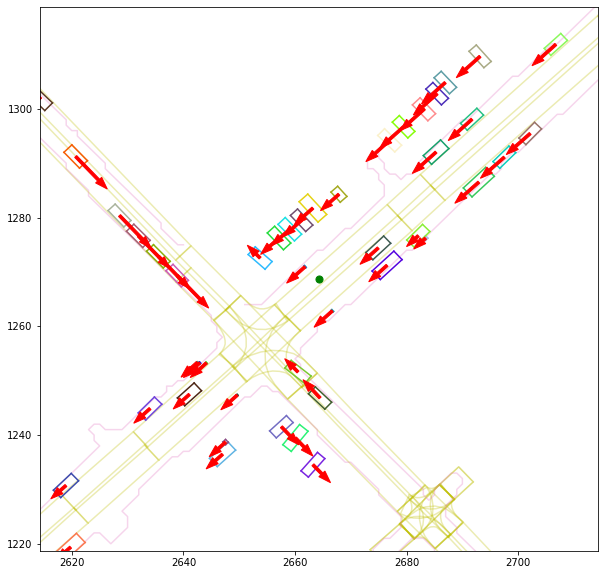

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
xcenter,ycenter,_ = argoverse_data.get_pose(idx).translation

r = 50
xmin = xcenter - r  # 150
xmax = xcenter + r  # 150
ymin = ycenter - r  # 150
ymax = ycenter + r  # 150
ax.scatter(xcenter, ycenter, 200, color="g", marker=".", zorder=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], city_name)
local_das = am.find_local_driveable_areas([xmin, xmax, ymin, ymax], city_name)



domv.render_bev_labels_mpl(
    city_name = city_name,
    ax = ax,
    axis = "city_axis",
    lidar_pts = None,
    local_lane_polygons = copy.deepcopy(local_lane_polygons),
    local_das = copy.deepcopy(local_das),
    log_id = log_id,
    timestamp = argoverse_data.lidar_timestamp_list[idx],
    city_to_egovehicle_se3 = city_to_egovehicle_se3,
    avm = am,
    vis_other_objects = True
)

prev_timestamp = argoverse_data.lidar_timestamp_list[idx]
print(f"timestamp: {prev_timestamp}")


timestamp diff: 100196000


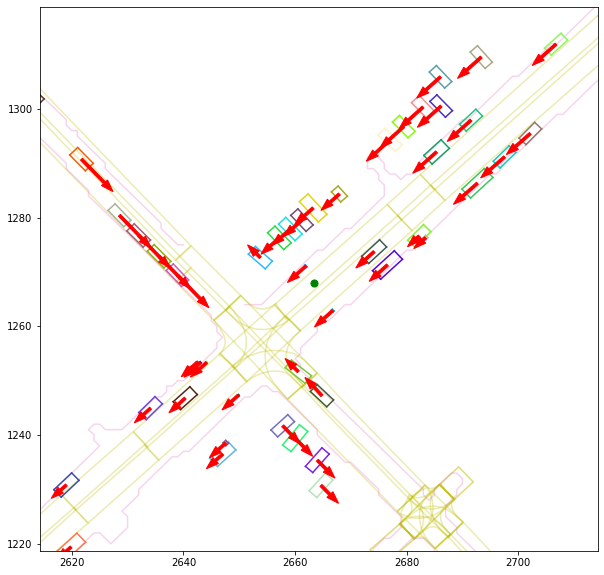

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
idx_new = idx + 1
xcenter,ycenter,_ = argoverse_data.get_pose(idx_new).translation
ax.scatter(xcenter, ycenter, 200, color="g", marker=".", zorder=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

domv.render_bev_labels_mpl(
    city_name = city_name,
    ax = ax,
    axis = "city_axis",
    lidar_pts = None,
    local_lane_polygons = copy.deepcopy(local_lane_polygons),
    local_das = copy.deepcopy(local_das),
    log_id = log_id,
    timestamp = argoverse_data.lidar_timestamp_list[idx_new],
    city_to_egovehicle_se3 = city_to_egovehicle_se3,
    avm = am,
    vis_other_objects = True
)

new_timestamp = argoverse_data.lidar_timestamp_list[idx_new]
print(f"timestamp diff: {(new_timestamp - prev_timestamp)}")


In [8]:
objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idx+10]]
len(objects), objects[1].track_uuid
# for i, obj in enumerate(objects):
#     print(np.linalg.norm(argoverse_data.get_pose(idx).translation - np.mean(obj.bbox_city_fr, axis=0)))

for i, obj in enumerate(objects):
    print(obj.bbox_city_fr)

[[2660.99817724 1242.04046364   16.39088079]
 [2662.50775323 1240.81942727   16.43960369]
 [2657.99216221 1238.32664667   16.4545581 ]
 [2659.5017382  1237.10561031   16.50328101]]
[[2602.42298714 1213.61090265   16.8750411 ]
 [2601.21741843 1214.86506081   16.83910507]
 [2605.56225788 1216.62804094   16.85728814]
 [2604.35668917 1217.8821991    16.82135211]]
[[2577.54033678 1196.02156696   17.65741992]
 [2576.92040249 1196.6639831    17.63911316]
 [2577.97212063 1196.4381678    17.65487935]
 [2577.35218633 1197.08058394   17.63657259]]
[[2632.36798413 1237.93875072   16.45490132]
 [2631.04029753 1239.36979654   16.41471743]
 [2635.35505198 1240.70963527   16.4392927 ]
 [2634.02736537 1242.14068109   16.39910881]]
[[2675.41845712 1268.62946772   16.30635808]
 [2673.94559833 1270.18870427   16.26209458]
 [2679.30682991 1272.30183541   16.28525465]
 [2677.83397112 1273.86107196   16.24099115]]
[[2605.52259951 1203.28641813   17.25444991]
 [2605.93781387 1202.85346833   17.26675865]
 [260

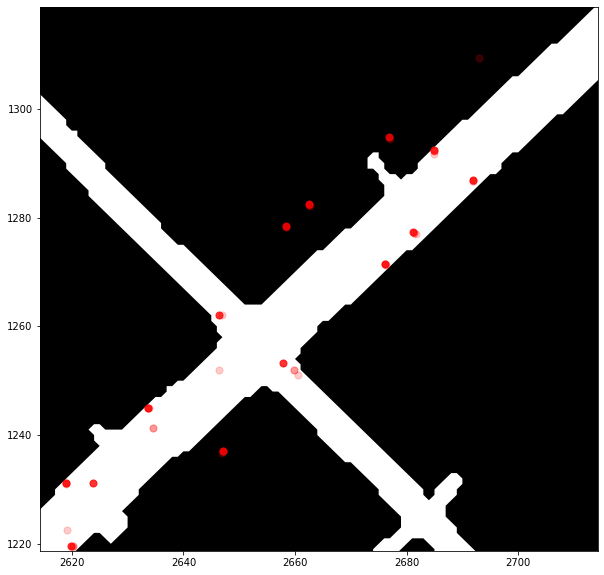

In [9]:
idx = 100

fig, ax = plt.subplots(figsize=(10,10))
rrr = 0
ax.set_xlim([xmin-rrr, xmax+rrr])
ax.set_ylim([ymin-rrr, ymax+rrr])

# create map
poly = local_das[0]
ax.add_patch(Polygon(poly[:,0:2], facecolor="white", alpha=1))
for i in range(1,len(local_das)):
    poly = local_das[i]
    ax.add_patch(Polygon(poly[:,0:2], facecolor="black", alpha=1))
    
#display ego
xcenter,ycenter,_ = argoverse_data.get_pose(idx).translation
ax.scatter(xcenter, ycenter, 300, color="g", marker=".", zorder=2)
    
#display other objects
objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idx]]
for i, obj in enumerate(objects):
    if obj.obj_class_str =="VEHICLE":
        ax.scatter(np.mean(obj.bbox_city_fr,axis=0)[0], np.mean(obj.bbox_city_fr,axis=0)[1], 200, color="r", marker=".", zorder=2, alpha=0.2)
        
objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idx+15]]
for i, obj in enumerate(objects):
    if obj.obj_class_str =="VEHICLE":
        ax.scatter(np.mean(obj.bbox_city_fr,axis=0)[0], np.mean(obj.bbox_city_fr,axis=0)[1], 200, color="r", marker=".", zorder=2, alpha=0.4)
        
objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idx+30]]
for i, obj in enumerate(objects):
    if obj.obj_class_str =="VEHICLE":
        ax.scatter(np.mean(obj.bbox_city_fr,axis=0)[0], np.mean(obj.bbox_city_fr,axis=0)[1], 200, color="r", marker=".", zorder=2, alpha=0.8)
        


        
plt.show()

In [10]:
idxx = 0
objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idxx]]
uuid = objects[4].track_uuid

In [11]:
# unique_objects = set()
objects_from_to = dict()

for idxx in range(len(argoverse_data.lidar_timestamp_list)):
    objects = domv.log_timestamp_dict[log_id][argoverse_data.lidar_timestamp_list[idxx]]
    for i, obj in enumerate(objects):
        if obj.obj_class_str =="VEHICLE":
#             unique_objects.add(obj.track_uuid)
            if obj.track_uuid not in objects_from_to:
                objects_from_to[obj.track_uuid] = dict()
                objects_from_to[obj.track_uuid]['start'] = idxx
                objects_from_to[obj.track_uuid]['positions10Hz'] = []
                objects_from_to[obj.track_uuid]['positions10Hz'].append(np.concatenate(([idxx],np.mean(obj.bbox_city_fr, axis=0))))
            else:
                objects_from_to[obj.track_uuid]['stop'] = idxx
                objects_from_to[obj.track_uuid]['positions10Hz'].append(np.concatenate(([idxx],np.mean(obj.bbox_city_fr, axis=0))))
                
                
print(len(objects_from_to))


99


In [ ]:
def get_plot(map_range, pix_to_pix_mapping=True):
    
    if pix_to_pix_mapping:
        my_dpi = 96.0  # screen constant, check here https://www.infobyip.com/detectmonitordpi.php
        fig = plt.figure(figsize=((map_range[1] - map_range[0])/my_dpi, (map_range[3] - map_range[2])/my_dpi), dpi=my_dpi)
    else:
        fig = plt.figure(figsize=(10,10))
        
    ax = fig.add_subplot(111)
    ax.set_xlim([map_range[0], map_range[1]])
    ax.set_ylim([map_range[2], map_range[3]])
    ax.axis('off')
    
    return fig, ax

def add_map(ax, map_range):
    city_name = argoverse_data.city_name
    map_polygons = am.find_local_driveable_areas(map_range, city_name)
    
    poly = map_polygons[0]
    ax.add_patch(Polygon(poly[:,0:2], facecolor="white", alpha=1))
    for i in range(1,len(map_polygons)):
        poly = map_polygons[i]
        ax.add_patch(Polygon(poly[:,0:2], facecolor="black", alpha=1))
        
    return ax

def add_ego(ax, ego_pos):
    ax.scatter(ego_pos[0], ego_pos[1], 300, color="g", marker=".", zorder=2)
    return ax

def add_vehicle_path(ax, positions):
    positions = np.array(positions)
    ax.scatter(positions[:,1], positions[:,2], 100, color="r", marker=".", zorder=2, alpha=0.2)
    
    return ax

def add_other_vehicles_paths(ax, other_vehicles):
    for veh in other_vehicles.values():
        positions = np.array(veh['positions10Hz'])
        ax.scatter(positions[:,1], positions[:,2], 100, color="blue", marker=".", zorder=2, alpha=0.2)
    return ax

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def visualize_vehicle_path(uuid, target_object, viz_trajectories=False):
    idx_start = target_object['start']
    idx_stop = target_object['stop']
    positions = target_object['positions10Hz']
    map_range = target_object['map_range']
    ego_pos = target_object['ego_pos']
    other_vehicles = target_object['other_vehicles']

    print(f"Actual path of {uuid}, start: {idx_start}, stop: {idx_stop}, length: {idx_stop - idx_start}")

    fig, ax = get_plot(map_range, pix_to_pix_mapping=True)
    ax = add_map(ax, map_range)
    if viz_trajectories:
        ax = add_ego(ax, ego_pos)
        ax = add_vehicle_path(ax, positions)
        ax = add_other_vehicles_paths(ax, other_vehicles)


    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    data = rgb2gray(data)
    
    target_object['img'] = data
    
#     plt.show()
    

        

In [40]:
def get_map_range(idx):
    xcenter,ycenter,_ = argoverse_data.get_pose(idx).translation
    r = 25
    xmin = xcenter - r
    xmax = xcenter + r
    ymin = ycenter - r
    ymax = ycenter + r
    
    return [xcenter, ycenter], [xmin, xmax, ymin, ymax]

def interpolate_missing_frames(positions):
    interpolated_positions = []
    idxs  = positions[:,0]
    pos_x = positions[:,1]
    pos_y = positions[:,2]
    
    desired_idxs = np.arange(idxs[0],idxs[-1]+1,1)
   
    new_pos_x = np.interp(desired_idxs, idxs, pos_x)
    new_pos_y = np.interp(desired_idxs, idxs, pos_y)
    
    interpolated_positions = np.column_stack((desired_idxs, new_pos_x, new_pos_y))
    return interpolated_positions

def is_within(pos, map_range):
    [xmin, xmax, ymin, ymax] = map_range
    return xmin <= pos[1] <= xmax and ymin <= pos[2] <= ymax

def trim_path_to_visible(positions):
    valid_positions = []
    positions = np.array(positions)
    
    map_range = None
    ego_pos = None
    starting_position_found = False
    
    for pos in positions:        
        if not starting_position_found:
            ego_pos, map_range = get_map_range(int(pos[0]))
            
        if is_within(pos, map_range):
            valid_positions.append(pos)
            starting_position_found = True
    
    return ego_pos, map_range, np.array(valid_positions)

def trim_and_interpolate_object(target_object):
    positions = target_object['positions10Hz']
    ego_pos, map_range, positions = trim_path_to_visible(positions)
    
    if positions.size:
        positions = interpolate_missing_frames(positions)
        
        target_object['start'] = int(positions[0][0])
        target_object['stop'] = int(positions[-1][0])
        target_object['positions10Hz'] = positions
        target_object['map_range'] = map_range
        target_object['ego_pos'] = ego_pos
        
        return target_object
    
    return None

# we're looking for other vehicles around our target vehicles, to model social forces
def add_other_vehicles(target_uuid, target_object, other_objects):
    map_range = target_object['map_range']
    target_start = target_object['start']
    target_stop = target_object['stop']
    
    other_objects_valid = dict()
    
    # process every other vehicle one by one and check if it's visible by ego vehicle and add to other vehicles data structure
    for other_uuid, other_object in other_objects.items():
        # don't compare to self
        if target_uuid == other_uuid:
            pass
        else:
            other_postitions = np.array(other_object['positions10Hz'])
            # get only the positions in the timeframe of the target vehicle
            other_postitions = other_postitions[(other_postitions[:,0] >= target_start) & (other_postitions[:,0] <= target_stop)]
            
            # iterate through all the positions
            for other_pos in other_postitions:   
                
                # check if ego_vehicle can actually see it
                if is_within(other_pos, map_range):                    
                    # if the dict doesn't have an entry with the uuid, initialize it
                    if other_uuid not in other_objects_valid:
                        other_objects_valid[other_uuid] = dict()
                        other_objects_valid[other_uuid]['positions10Hz'] = None
                        
                    # add the position entry if the ego vehicle can see the object   
                    other_objects_valid[other_uuid]['positions10Hz'] = np.vstack(
                        (other_objects_valid[other_uuid]['positions10Hz'], other_pos)) if other_objects_valid[other_uuid]['positions10Hz'] is not None else np.reshape(other_pos, (1, -1))
                
                    
    target_object['other_vehicles'] = other_objects_valid
    return target_object                  

def add_img(new_target_object):
    map_range = target_object['map_range']
    
    fig, ax = get_plot(map_range, pix_to_pix_mapping=True)
    ax = add_map(ax, map_range)
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#     data = rgb2gray(data)
    
    target_object['img'] = data
    target_object['img_shape'] = data.shape
    plt.close()    
    
    return target_object


valid_target_objects = dict()
for i, (uuid, target_object) in enumerate(objects_from_to.items()):
#     if i >= 1:
#         break
    # get a segment of the path that is visible by ego vehicle, and interpolate missing frames
    new_target_object = trim_and_interpolate_object(target_object)
    if new_target_object is not None:
        new_target_object = add_other_vehicles(uuid, new_target_object, objects_from_to)
        new_target_object = add_img(new_target_object)
        valid_target_objects[uuid] = new_target_object

print(len(valid_target_objects))
uuid = list(valid_target_objects.keys())[0]
print(uuid)
# valid_target_objects[uuid]['other_vehicles']['605e47ae-13a8-478e-9edc-3175ae125908']['positions10Hz']

/media/bartosz/hdd1TB/workspace_hdd/envs/python3env/lib/python3.6/site-packages/ipykernel_launcher.py:106: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


38
97bd28ba-a7a7-477e-9b01-c8c96efb43fb


Actual path of 97bd28ba-a7a7-477e-9b01-c8c96efb43fb, start: 6, stop: 61, length: 55


/media/bartosz/hdd1TB/workspace_hdd/envs/python3env/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


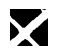

In [24]:
for i in range(0,1):
    uuid = list(valid_target_objects.keys())[i]
    target_object = valid_target_objects[uuid]
    visualize_vehicle_path(uuid, target_object)
    

In [41]:
# pickle_out = open("/media/bartosz/hdd1TB/workspace_hdd/SS-LSTM/data/argoverse/train_data_01.pickle","wb")
# pickle.dump(valid_target_objects, pickle_out)
# pickle_out.close()

In [15]:
print(valid_target_objects['d9947a79-b94f-4db9-9f79-7b7aeb803354']['other_vehicles']['ef1474cf-ab4c-4b10-b366-d1ddf8e3b632']['positions10Hz'].shape)


(111, 4)


In [59]:
a = np.array([1,2,3])
a.shape

b = np.array([4,5,6])
ab = np.vstack((a,b))
print(ab.shape)

c = np.array([4,5,6])
np.vstack((ab,c)).shape

(2, 3)


(3, 3)